In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importing the dataset
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
#dropping unwanted columns
df.drop(columns=['Unnamed: 0'])


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
#Checking the shape of a dataframe and datatypes of
#all columns along with calculating the statistical data.
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


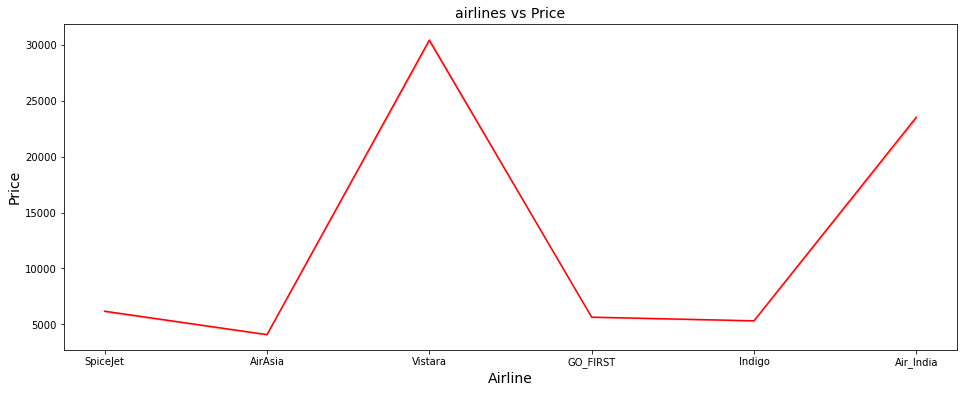

In [8]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df['airline'],y=df['price'],color='red')
plt.title('airlines vs Price',fontsize=14)
plt.xlabel('Airline',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

In [9]:
#there is variation in price with different airlines

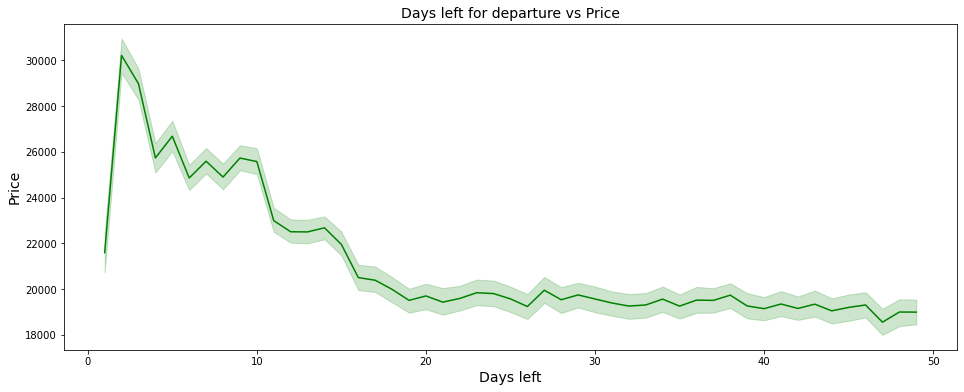

In [10]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df['days_left'],y=df['price'],color='green')
plt.title('Days left for departure vs Price',fontsize=14)
plt.xlabel('Days left',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

<AxesSubplot:xlabel='airline', ylabel='price'>

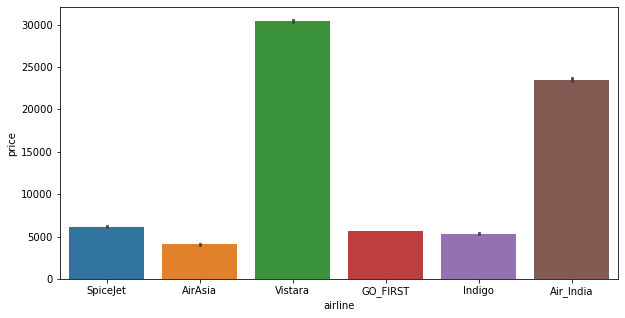

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

In [12]:
#Vistara has highest ticket price among all airlines


<AxesSubplot:xlabel='class', ylabel='price'>

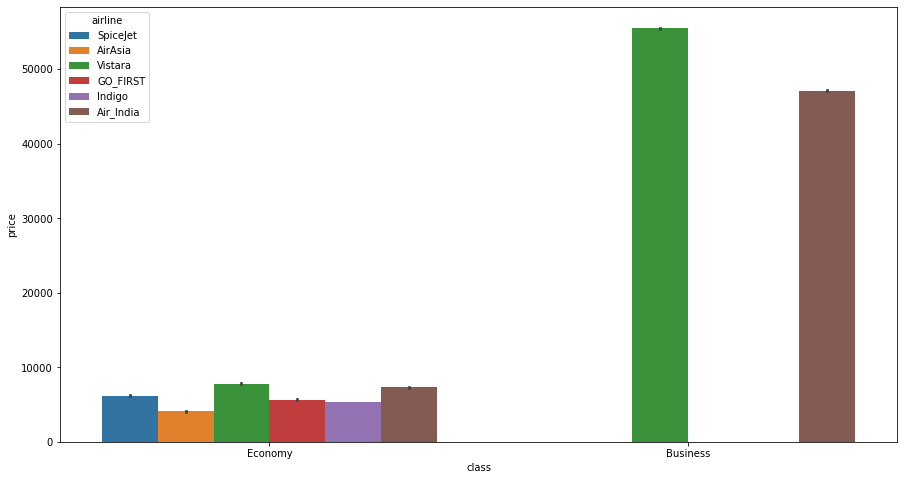

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='class',y='price',data=df,hue='airline')

In [14]:
#Vistara buissness class have highest fair among classes and airlines followed by air india 

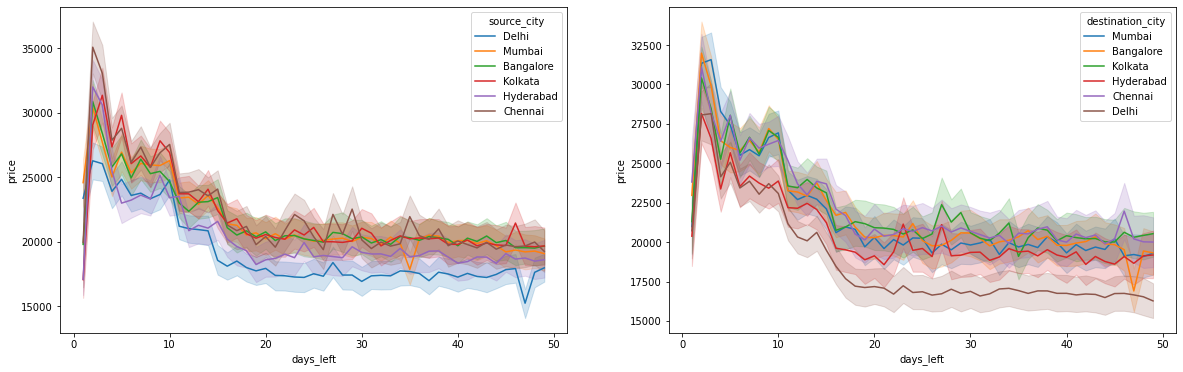

In [15]:
#Range of price of flight with source and destination according to the days left 
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

In [16]:
#As we can see flight from chennai to delhi closer to departure have highest price 

Text(0.5, 1.0, 'Frequency of Class')

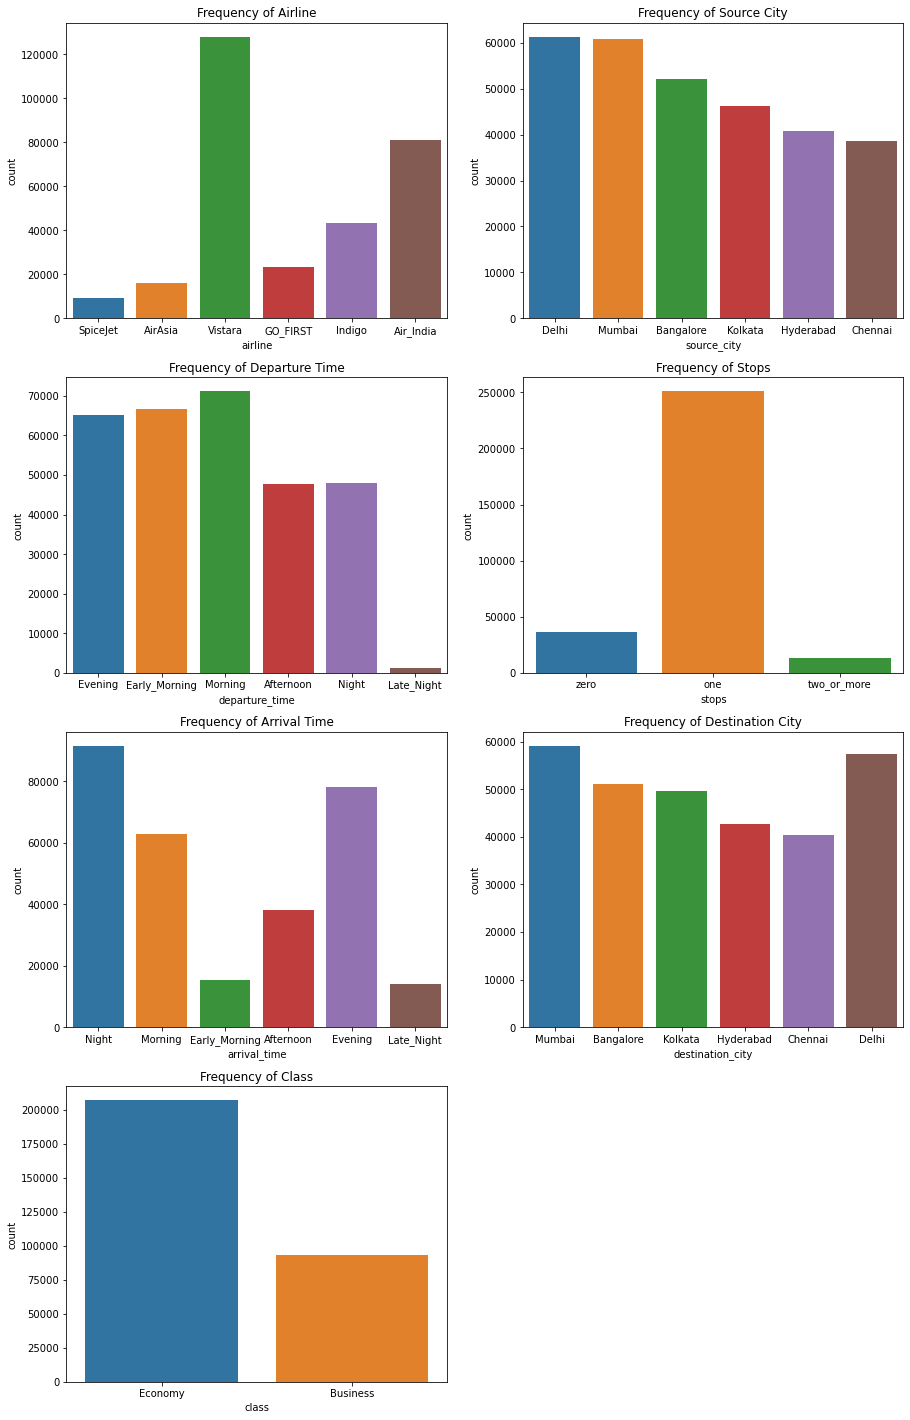

In [17]:
#visualization of categorical features with count plot
plt.figure(figsize=(15,25))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('Frequency of Class')

In [18]:
#Lets perform one hot encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int32  
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  int32  
 4   departure_time    300153 non-null  int32  
 5   stops             300153 non-null  int32  
 6   arrival_time      300153 non-null  int32  
 7   destination_city  300153 non-null  int32  
 8   class             300153 non-null  int32  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(1)
memory usage: 19.5+ MB


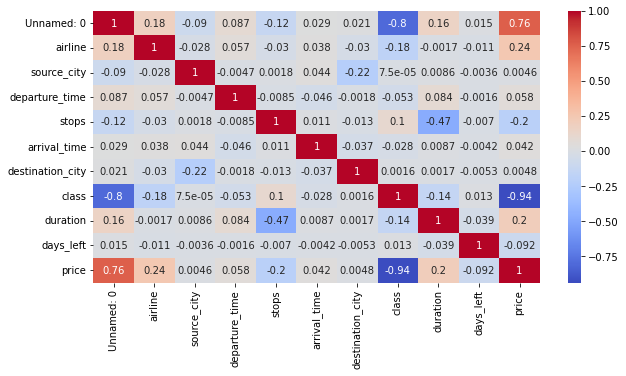

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [20]:
#selecting the features using VIF . VIF should be less than 5 . 
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col !='price')):
        col_list.append(col)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]
vif_data

,feature,VIF
0,Unnamed: 0,6.420074
1,airline,3.776008
2,source_city,2.981667
3,departure_time,2.908666
4,stops,1.460119
5,arrival_time,3.922821
6,destination_city,3.114813
7,class,4.512035
8,duration,4.701263
9,days_left,4.385177


In [21]:
#as VIF of stops is more than 5 so we drop this 
df=df.drop(columns=['stops','Unnamed: 0'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(2), object(1)
memory usage: 16.0+ MB


In [23]:
x = df.drop(columns=['price','flight'])
y=df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference = pd.DataFrame(np.concatenate([y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1), columns=['Actual_value', 'Predicted_Value'])
difference

,Actual_value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.897752737512321

In [25]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4468.426673542108

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)


0.3476580461068174

In [27]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error


52706651.33334208

In [28]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7259.934664536733

C:\Users\MUKUND\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MUKUND\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


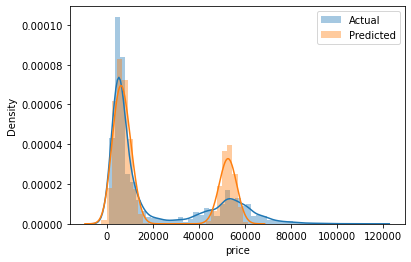

In [29]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
 

In [31]:
r2_score(y_test,y_pred)

0.9745806724587677

In [32]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1218.642237621673

In [33]:
mean_absolute_percentage_error(y_test,y_pred)

0.07744482306870112

In [34]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

13103212.753546316

In [35]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3619.8360119688177

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.9844847186870984

In [38]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1125.206744401041

In [39]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

7997852.486235147

In [40]:
mean_absolute_percentage_error(y_test,y_pred)

0.07349003446305971

In [41]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2828.0474688793943